In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
np.set_printoptions(precision=6) #Mostrar numeros con maximo seis digitos de precision
np.set_printoptions(suppress=True) # Suprimir uso de notacion cientifica para numeros muy pequenos

In [171]:
N = 23 # Numero de periodos
mYah = 1 # Numero de acciones extraidas de Yahoo
mFin = 6 # Numero de acciones extraidas de Finance.com
m = mYah + mFin # Numero de acciones

precios = np.zeros((m, N+1))
retornos = np.zeros((m, N))

Extrayendo columnas de los archivos de Yahoo Finance:

In [172]:
archivosYahoo = ['csvs/EC.csv','csvs/CIB.csv']

In [173]:
for k in range(mYah):
    archivo = archivosYahoo[k]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N+1):
        precios[k, i] = lector.__next__()[5] #Extraer la 5ta columna: precio de cierre ajustado
        if (i > 0):
            retornos[k, i-1] = (precios[k, i] - precios[k, i-1])/precios[k, i-1]

Extrayendo columnas de los archivos de Investing.com

In [174]:
 archivosFin = [ 'csvs/CFV-2.csv', 'csvs/FTSE-2.csv', 'csvs/IMI-2.csv', 'csvs/BIC_p1-2.csv', 'csvs/MAS-2.csv', 'csvs/PMG-2.csv']

In [175]:
for k in range(mYah, mYah + mFin):
    archivo = archivosFin[k - mYah]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N, -1, -1):
        precios[k, i] = lector.__next__()[1] #Extraer la 1era columna: precio de cierre
        if (i < N):
            retornos[k, i] = (precios[k, i+1] - precios[k, i])/precios[k, i]

In [176]:
np.shape(retornos)

(7, 23)

TODO: Explicar, a la luz de la lectura 1, la naturaleza de esos activos.

# 3

Vector de Rendimientos promedio

In [177]:
retProm = np.mean(retornos, 1, keepdims = True) # Hallar el promedio de la matriz de retornos a lo largo del eje temporal
print("Tamaño de matriz de rentabilidades:", np.shape(retProm)) # En efecto el vector retProm tiene tamaño 7x1, donde 7 es el número de activos
print("Retornos promedio:\n", retProm)

Tamaño de matriz de rentabilidades: (7, 1)
Retornos promedio:
 [[0.031721]
 [0.001484]
 [0.010866]
 [0.005016]
 [0.019599]
 [0.018384]
 [0.003606]]


Matriz de Covarianzas

In [178]:
S = np.zeros((m, m)) # Inicializacion en 0's

for k in range(m): # Iterar con k sobre activos
    for l in range(m): # Iterar con l sobre activos
        for i in range(N): # Iterar sobre el tiempo con i
            # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
            S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l]) 
            
print("Matriz de covarianzas:\n", S)

Matriz de covarianzas:
 [[ 0.396993  0.089865  0.105785  0.088195  0.050704 -0.020436 -0.00533 ]
 [ 0.089865  0.195841  0.069729  0.070606  0.066326  0.016321 -0.037663]
 [ 0.105785  0.069729  0.053816  0.042587  0.049801  0.0114   -0.005918]
 [ 0.088195  0.070606  0.042587  0.083977  0.040482  0.027572 -0.010649]
 [ 0.050704  0.066326  0.049801  0.040482  0.071042  0.008762 -0.019772]
 [-0.020436  0.016321  0.0114    0.027572  0.008762  0.139274 -0.01058 ]
 [-0.00533  -0.037663 -0.005918 -0.010649 -0.019772 -0.01058   0.17264 ]]


## Matriz de Covarianzas es Definida Positiva

### Matriz Cuadrada

In [179]:
np.shape(S)

(7, 7)

### Simétrica

In [180]:
S - S.transpose() # Debería ser igual a su transpuesta,  y lo es pues su diferencia es 0

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### Definida Positiva

Usamos la caracterización vista en clase: los subdeterminantes en línea son positivos. En particular vemos que el determinante de la matriz es distinto de $0$.

In [181]:
for k in range(1,m):
    submatPpal = S[:k, :k]
    detp = np.linalg.det(submatPpal)
    print("El determinante de la submatriz  de tamaño ", np.shape(submatPpal), " que contiene la entrada 1,1, es decir la matriz\n", submatPpal, " es ", detp, "!= 0\n")

El determinante de la submatriz  de tamaño  (1, 1)  que contiene la entrada 1,1, es decir la matriz
 [[0.396993]]  es  0.39699285797971506 != 0

El determinante de la submatriz  de tamaño  (2, 2)  que contiene la entrada 1,1, es decir la matriz
 [[0.396993 0.089865]
 [0.089865 0.195841]]  es  0.06967184316092179 != 0

El determinante de la submatriz  de tamaño  (3, 3)  que contiene la entrada 1,1, es decir la matriz
 [[0.396993 0.089865 0.105785]
 [0.089865 0.195841 0.069729]
 [0.105785 0.069729 0.053816]]  es  0.000953388071341158 != 0

El determinante de la submatriz  de tamaño  (4, 4)  que contiene la entrada 1,1, es decir la matriz
 [[0.396993 0.089865 0.105785 0.088195]
 [0.089865 0.195841 0.069729 0.070606]
 [0.105785 0.069729 0.053816 0.042587]
 [0.088195 0.070606 0.042587 0.083977]]  es  4.504655173024123e-05 != 0

El determinante de la submatriz  de tamaño  (5, 5)  que contiene la entrada 1,1, es decir la matriz
 [[0.396993 0.089865 0.105785 0.088195 0.050704]
 [0.089865 0.195

In [182]:
Sinv = np.linalg.inv(S)
print(Sinv)

[[  19.965983   10.667413  -85.222984   -8.35864    40.590733    8.110164
     4.652734]
 [  10.667413   16.130061  -56.841296   -7.626437   22.115306    4.769523
     4.254653]
 [ -85.222984  -56.841296  441.707142   23.885875 -211.924942  -35.284305
   -24.852004]
 [  -8.35864    -7.626437   23.885875   25.466633  -17.936723   -6.351272
    -1.975797]
 [  40.590733   22.115306 -211.924942  -17.936723  124.72928    17.407775
    13.059385]
 [   8.110164    4.769523  -35.284305   -6.351272   17.407775   11.040911
     2.360055]
 [   4.652734    4.254653  -24.852004   -1.975797   13.059385    2.360055
     7.530845]]


In [183]:
S.dot(Sinv)

array([[ 1.,  0.,  0.,  0., -0., -0.,  0.],
       [-0.,  1.,  0., -0., -0., -0., -0.],
       [-0.,  0.,  1.,  0.,  0., -0., -0.],
       [-0.,  0., -0.,  1., -0., -0.,  0.],
       [-0.,  0., -0.,  0.,  1., -0., -0.],
       [-0., -0., -0.,  0., -0.,  1., -0.],
       [-0.,  0.,  0.,  0.,  0., -0.,  1.]])

# 4

Parámetros de la teoría

In [184]:
u = np.ones((m, 1))

A = u.transpose().dot(Sinv.dot(u))[0,0]
B = u.transpose().dot(Sinv.dot(retProm))[0,0]
C = retProm.transpose().dot(Sinv.dot(retProm))[0,0]
D = A*C - B**2

print("A =", A, "\t B =", B, "\t C =", C, ", entonces D =", D)

A = 37.569285781218774 	 B = 0.10231792192039774 	 C = 0.031123606269526646 , entonces D = 1.1588227013358703


# 5

Ecuación general de los portafolios óptimos dados los parámetros de la teoría $A, B, C$ y el parámetro $\mu$: $x*(\mu) = (\frac{C - B\mu}{D}) S^{-1} \hat u + (\frac{A \mu - B}{D})S^{-1}\bar r$, en nuestro caso, como:

In [185]:
def xOptMu(mu):
    return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)

rentDeseadas = np.linspace(0., 0.02, 9).reshape((9,1,1))

portOptMu = np.zeros( (len(rentDeseadas), m, 1) )

for i in range(len(rentDeseadas)):
    portOptMu[i] = xOptMu(rentDeseadas[i])
    
print(tabulate(np.concatenate((rentDeseadas,portOptMu), axis = 1), ["Mu"] +["% Activo "+str(i) for i in range(1, 8)]))

    Mu    % Activo 1    % Activo 2    % Activo 3    % Activo 4    % Activo 5    % Activo 6    % Activo 7
------  ------------  ------------  ------------  ------------  ------------  ------------  ------------
0         -0.314433     -0.19685       1.62602      0.222981      -0.474777      0.0196629      0.117394
0.0025    -0.260229     -0.175721      1.39095      0.191862      -0.33116       0.0517719      0.13253
0.005     -0.206025     -0.154593      1.15587      0.160743      -0.187543      0.0838809      0.147666
0.0075    -0.151821     -0.133464      0.920794     0.129624      -0.0439253     0.11599        0.162802
0.01      -0.0976168    -0.112336      0.685719     0.0985052      0.099692      0.148099       0.177938
0.0125    -0.0434129    -0.0912076     0.450643     0.0673861      0.243309      0.180208       0.193074
0.015      0.0107911    -0.0700792     0.215567     0.0362671      0.386926      0.212317       0.20821
0.0175     0.0649951    -0.0489508    -0.0195083    0.005

En todos los portafolios hay posiciones en corto.

# 6

Text(0, 0.5, 'Retorno  Promedio $\\mu$')

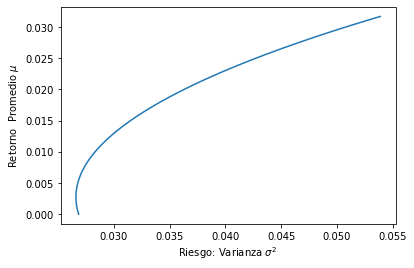

In [188]:
#varAx = np.linspace(0, 1.6*max([S[i, i] for i in range(m)]), 200)
mus = np.linspace(-0.0, np.max(retProm), 200)
frontera = (A*mus**2 - 2*mus*B + C)/D

plt.plot(frontera, mus)
plt.xlabel("Riesgo: Varianza $\sigma^2$")
plt.ylabel("Retorno  Promedio $\mu$")